<a href="https://colab.research.google.com/github/vivian-xia/Data-Engineering-Algorithms/blob/main/Module_7_Implement_Dijkstra_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Vivian Xia

## Implement Dijkstra's Algorithm

In [1]:
import time
from collections import deque

import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
#breadth-first search algorithm
def search(name):
    search_queue = deque()
    search_queue += graph[name]

    # This array is how you keep track of which people you've searched before.
    searched = ["NYC"]

    while search_queue:

        city = search_queue.popleft()
        # Only search this city if you haven't already searched them.
        if city not in searched:

            if city == 'Los Angeles':
                searched.append(city)
                return True, searched
            else:
                search_queue += graph[city]
                
                # Marks this city as searched
                searched.append(city)
    
    return False

In [3]:
#Dijkstra algorithm
def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

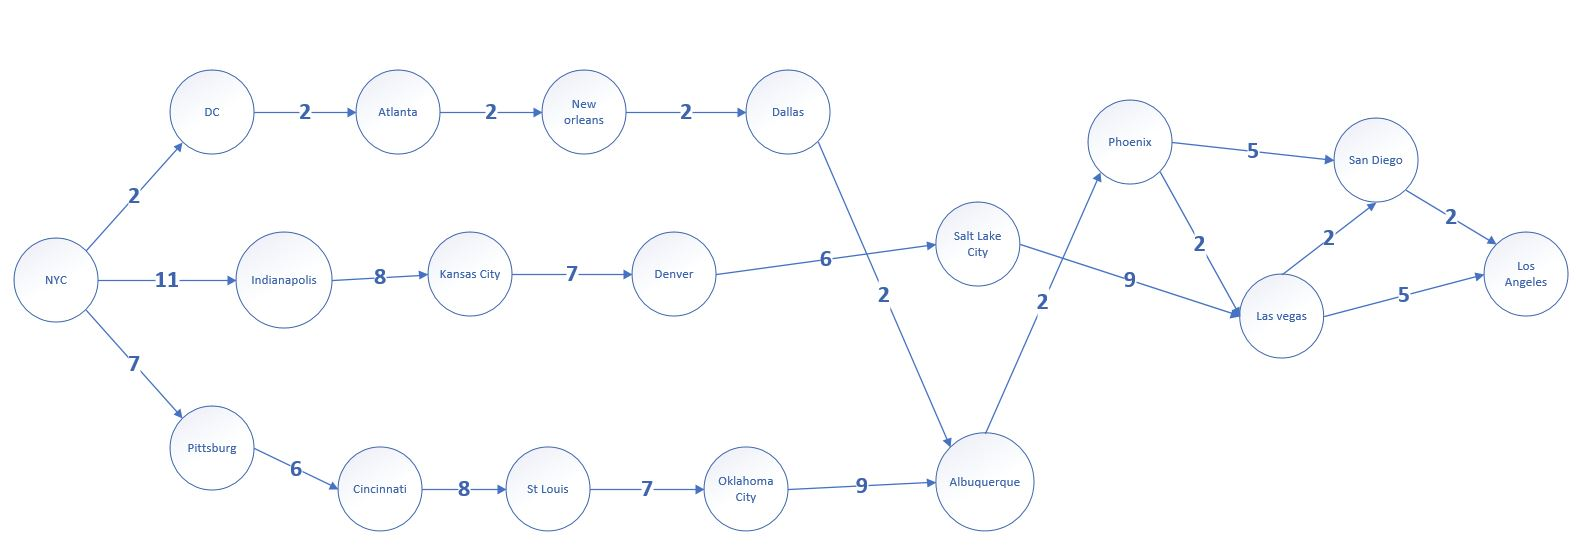

In [4]:
# the graph
graph = {}
graph["NYC"] = {}
graph["NYC"]["DC"] = 2
graph["NYC"]["Indianapolis"] = 11
graph["NYC"]["Pittsburg"] = 7

graph["DC"] = {}
graph["DC"]["Atlanta"] = 2

graph["Atlanta"] = {}
graph["Atlanta"]["New Orleans"] = 2

graph["New Orleans"] = {}
graph["New Orleans"]["Dallas"] = 2

graph["Dallas"] = {}
graph["Dallas"]["Albuquerque"] = 2

graph["Albuquerque"] = {}
graph["Albuquerque"]["Phoenix"] = 2

graph["Phoenix"] = {}
graph["Phoenix"]["Las Vegas"] = 2
graph["Phoenix"]["San Diego"] = 5

graph["San Diego"] = {}
graph["San Diego"]["Los Angeles"] = 2

graph["Las Vegas"] = {}
graph["Las Vegas"]["San Diego"] = 2
graph["Las Vegas"]["Los Angeles"] = 5

graph["Indianapolis"] = {}
graph["Indianapolis"]["Kansas City"] = 8

graph["Kansas City"] = {}
graph["Kansas City"]["Denver"] = 7

graph["Denver"] = {}
graph["Denver"]["Salt Lake City"] = 6

graph["Salt Lake City"] = {}
graph["Salt Lake City"]["Las Vegas"] = 9

graph["Pittsburg"] = {}
graph["Pittsburg"]["Cincinnati"] = 6

graph["Cincinnati"] = {}
graph["Cincinnati"]["St Louis"] = 8

graph["St Louis"] = {}
graph["St Louis"]["Oklahoma City"] = 7

graph["Oklahoma City"] = {}
graph["Oklahoma City"]["Albuquerque"] = 9

graph["Los Angeles"] = {}

In [5]:
# the costs table
infinity = float("inf")
costs = {}
costs["DC"] = 2
costs["Indianapolis"] = 11
costs["Pittsburg"] = 7
costs["Atlanta"] = infinity
costs["New Orleans"] = infinity
costs["Dallas"] = infinity
costs["Albuquerque"] = infinity
costs["Phoenix"] = infinity
costs["Las Vegas"] = infinity
costs["San Diego"] = infinity
costs["Kansas City"] = infinity
costs["Denver"] = infinity
costs["Salt Lake City"] = infinity
costs["Las Vegas"] = infinity
costs["Cincinnati"] = infinity
costs["St Louis"] = infinity
costs["Oklahoma City"] = infinity
costs["Los Angeles"] = infinity


# the parents table
parents = {}
parents["DC"] = "NYC"
parents["Indianapolis"] = "NYC"
parents["Pittsburg"] = "NYC"
parents["Atlanta"] = None
parents["New Orleans"] = None
parents["Dallas"] = None
parents["Albuquerque"] = None
parents["Phoenix"] = None
parents["Las Vegas"] = None
parents["San Diego"] = None
parents["Kansas City"] = None
parents["Denver"] = None
parents["Salt Lake City"] = None
parents["Las Vegas"] = None
parents["Cincinnati"] = None
parents["St Louis"] = None
parents["Oklahoma City"] = None
parents["Los Angeles"] = None


processed = []

First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).

In [6]:
start_time = time.perf_counter()
searched = search("NYC")
end_time = time.perf_counter()
BFS_time = end_time - start_time
print(BFS_time)

9.780700020201039e-05

Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [7]:
print(' --> '.join(searched[1]))

NYC --> DC --> Indianapolis --> Pittsburg --> Atlanta --> Kansas City --> Cincinnati --> New Orleans --> Denver --> St Louis --> Dallas --> Salt Lake City --> Oklahoma City --> Albuquerque --> Las Vegas --> Phoenix --> San Diego --> Los Angeles


Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).

In [28]:
start_time = time.perf_counter()


# Find the lowest-cost node that you haven't processed yet.
node = find_lowest_cost_node(costs)
# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)


end_time = time.perf_counter()
lowest_cost_time = end_time - start_time


print("Cost from the start to each node:")
print(costs)
print(lowest_cost_time)

Cost from the start to each node:
{'DC': 2, 'Indianapolis': 11, 'Pittsburg': 7, 'Atlanta': 4, 'New Orleans': 6, 'Dallas': 8, 'Albuquerque': 10, 'Phoenix': 12, 'Las Vegas': 14, 'San Diego': 16, 'Kansas City': 19, 'Denver': 26, 'Salt Lake City': 32, 'Cincinnati': 13, 'St Louis': 21, 'Oklahoma City': 28, 'Los Angeles': 18}
0.00014879399896017276


Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [29]:
## Build a trade path backwards
current_node, start_node = 'Los Angeles', 'NYC'

trade_path = [current_node]

while current_node != start_node:
    last_loc = parents[current_node]
    current_node = last_loc
    trade_path.append(last_loc)

trade_path = trade_path[::-1]

print(' --> '.join(trade_path))

NYC --> DC --> Atlanta --> New Orleans --> Dallas --> Albuquerque --> Phoenix --> Las Vegas --> San Diego --> Los Angeles


Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.

In [30]:
BFS = ["Breadth-First", BFS_time, len(searched[1])]
Dijkstra = ["Dijkstra", lowest_cost_time, len(trade_path)]

table = []
table.append(BFS)
table.append(Dijkstra)

In [31]:
col_names = ["Algorithm", "Time", "Stops"]

print(tabulate(table, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════╤═════════════╤═════════╕
│ Algorithm     │        Time │   Stops │
╞═══════════════╪═════════════╪═════════╡
│ Breadth-First │ 9.7807e-05  │      18 │
├───────────────┼─────────────┼─────────┤
│ Dijkstra      │ 0.000148794 │      10 │
╘═══════════════╧═════════════╧═════════╛


Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.

In [32]:
df = pd.DataFrame(table) #create a dataframe of the list of times
df.columns = col_names
df.head()

,Algorithm,Time,Stops
0,Breadth-First,0.000098,18
1,Dijkstra,0.000149,10


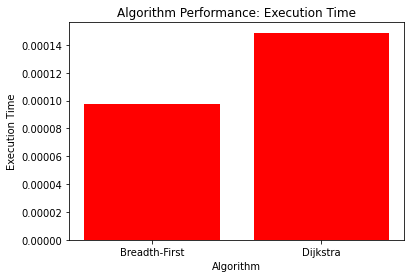

In [33]:
plt.bar(df['Algorithm'], df['Time'], color = 'red')

plt.title('Algorithm Performance: Execution Time')
plt.xlabel('Algorithm')
plt.ylabel('Execution Time')

plt.show()

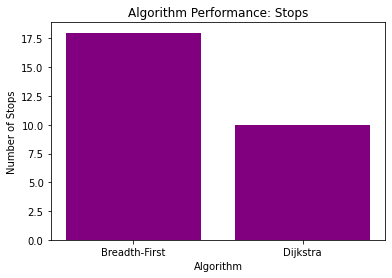

In [34]:
plt.bar(df['Algorithm'], df['Stops'], color = 'purple')

plt.title('Algorithm Performance: Stops')
plt.xlabel('Algorithm')
plt.ylabel('Number of Stops')

plt.show()

A graph was used to represent the possible routes to drive from NYC to Los Angeles where the nodes represented cities and the edges had weights that represented hours to get from city to city. A hash table/ dictionary was used to represent the graph and its connections between node and its neighboring nodes. This representation of the graph has a hash table within a hash table that represents the weights for each of the edges. 

For Dijkstra's algorithm, a cost and a parent hash table were also constructed. The cost hash table keeps the cost to get to that node from the starting node. The keys with infinity values are nodes that have not been reached yet, so the cost for that node is not yet known. The parent hash table keeps memory of which node the node comes from, so it keeps track of the path. The parent and cost hash tables will be updated as the algorithm loops through each time. 

A breadth-first search algorithm was used to search for a path from the starting node, NYC, and desired ending node, Los Angeles, as well as the shortest path or minimum number of edges between those two nodes. It searches through each level of the graph by checking all of the node's neighbors first before checking the neighbor's neighbors, so it searches the the first level then the second and on. By using a First In, First Out data structure, each city is dequeued from the queue and checked to see if the city is the desired destination of Los Angeles. If not, that city's neighbors are added to the queue and that city is added to a list of searched cities. Then the algorithm checks the next city in the queue. This algorithm looks to minimize the number of edges or cities traveled to get from NYC to Los Angeles, so it does not use the weights associated with each edge. It has a time complexity of O(V+E) where V is the number of vertices or nodes and the E is the number of edges. 

Dijkstra's algorithm was used to find the fastest route from NYC to Los Angeles. It takes into account the weights or travel hours associated with each edge to get to the the destination in the shortest amount of time. The algorithm goes through each node in the cost hash table to find that with the lowest cost. The costs for that node's neighbors are updated as well as the parent for that neighbor. That node is then added to the processed list so that the algorithm does not take that node again as the lowest cost node. The next lowest cost node is then found and the algorithm loops through to update costs and parents again. All the nodes in the graph are processed in the loop to find the lowest cost to get from NYC to Los Angeles.

There are two cases for the time complexity of Dijkstra's algorithm. The first case uses an unsorted array and no priority queue and has a time complexity of O(V^2). The second case uses a priority queue and has a time complexity of O(E logV). For this case, the implemented algorithm uses the time complexity of O(V^2). The algorithm loops through each node, resulting in O(V) where V is number of vertices. Updating the cost and parent hash tables have the time complexity of O(1), so the total time complexity to do that for every node is O(V). The resulting time complexity is O(V)*O(V) or O(V^2). 

From the table, it can be seen that Dijkstra's algorithm took less time to execute than Breadth-First Search algorithm. This difference in execution time is also evident in the bar graph as Dijkstra's algorithm took longer than BFS's to run. However, as the load and number of vertices increase, Dijkstra's algorithm will become more efficient than BFS's. Dijkstra's algorithm's execution time will scale quadratically while BFS's will scale linearly as the load increases. 

These visualizations also show that Dijkstra's number of stops was less than that of BFS's. Dijkstra's algorithm not only found the lowest cost path but also the one with less stops. BFS's algorithm did not find the least amount of edges for the shortest path since Dijkstra's found a path with only 9 edges while BFS's path had 17 edges.

Dijakstra's algorithm is useful because it can find the lowest cost path from node A to node B. It takes into account the weights between each node, unlike the BFS algorithm. It can be useful in different applications that use weighted and directed graphs such as the iconic traveling salesman problem. The time complexity also makes it useful in applications because, as the load and number of vertices increases, the run time's rate will also scale and increase so that performance will not be compromised.
